In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import ContinuosActorCritic
from src.networks import ActorCriticNetwork
from src.policies import GaussianPolicy
from src.experience import ExperienceSorceDiscountedSteps

GAMMA = 0.99
LEARNING_RATE = 0.01
ENTROPY_BETA = 0.01
N_STEPS = 1
BATCH_SIZE = 32

CHECKPOINT_PATH = os.path.join("models", "04_mountaincar_ac.tar")


env = gym.make("MountainCarContinuous-v0")
test_env = gym.make("MountainCarContinuous-v0")
device = torch.device("cpu")
net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)

agent = ContinuosActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [2]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

In [3]:
agent.policy = GaussianPolicy(agent.net, agent.device)
agent.test_policy = GaussianPolicy(agent.net, agent.device, test=True)
agent.exp_train_source = ExperienceSorceDiscountedSteps(
    env=agent.env,
    policy=agent.policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source = ExperienceSorceDiscountedSteps(
    env=agent.env,
    policy=agent.test_policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)

In [4]:
agent.learn(10000, verbose_every=100)
# agent.plot_performance()

  1%|          | 108/10000 [00:01<02:47, 59.08it/s]
 100: loss=0.366594,  mean reward=-1460.62,  steps/ep=200,  episodes=16
  2%|▏         | 212/10000 [00:03<02:53, 56.50it/s]
 200: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=32
  3%|▎         | 304/10000 [00:05<03:10, 51.00it/s]
 300: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=48
  4%|▍         | 408/10000 [00:07<03:01, 52.71it/s]
 400: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=64
  5%|▌         | 505/10000 [00:09<02:39, 59.38it/s]
 500: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=80
  6%|▌         | 607/10000 [00:10<02:45, 56.90it/s]
 600: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=96
  7%|▋         | 712/10000 [00:12<02:34, 60.02it/s]
 700: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=112
  8%|▊         | 808/10000 [00:14<02:45, 55.46it/s]
 800: loss=nan,  mean reward=nan,  steps/ep=200,  episodes=128
  9%|▉         | 908/10000 [00:16<02:46, 54.60it/s]
 900: loss=nan,  mean re

KeyboardInterrupt: 

In [5]:
agent.test(num_episodes=1)

nan

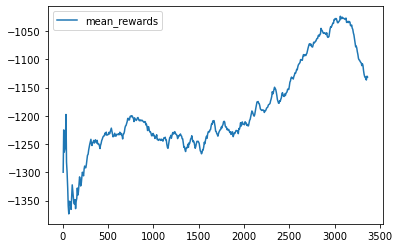

In [6]:
agent.plot_performance(['mean_rewards'])

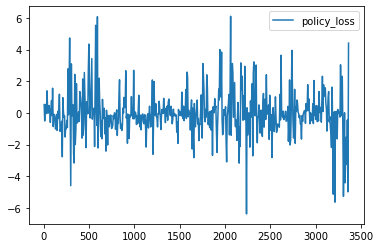

In [7]:
agent.plot_performance(['policy_loss'])

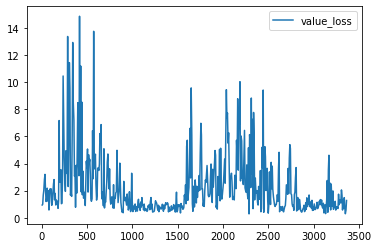

In [8]:
agent.plot_performance(['value_loss'])


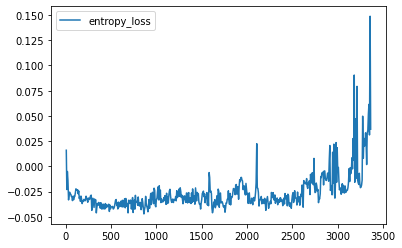

In [9]:
agent.plot_performance(['entropy_loss'])


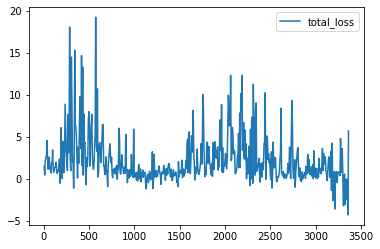

In [10]:
agent.plot_performance(['total_loss'])
